In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

In [2]:
data = pd.read_csv("Data_project.csv")

In [3]:
data.shape

(25192, 42)

In [4]:
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
duration                       25192 non-null int64
protocol_type                  25192 non-null object
service                        25192 non-null object
flag                           25192 non-null object
src_bytes                      25192 non-null int64
dst_bytes                      25192 non-null int64
land                           25192 non-null int64
wrong_fragment                 25192 non-null int64
urgent                         25192 non-null int64
hot                            25192 non-null int64
num_failed_logins              25192 non-null int64
logged_in                      25192 non-null int64
num_compromised                25192 non-null int64
root_shell                     25192 non-null int64
su_attempted                   25192 non-null int64
num_root                       25192 non-null int64
num_file_creations             25192 non-null int64
num_

In [6]:
data.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
6,0,tcp,private,S0,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
7,0,tcp,private,S0,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
9,0,tcp,private,S0,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [8]:
df=data.drop(['num_outbound_cmds','is_host_login'], axis=1)

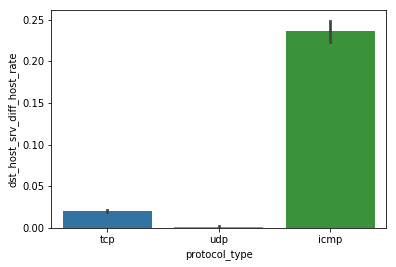

In [9]:
sns.barplot(x=df['protocol_type'],y=df['dst_host_srv_diff_host_rate'])
plt.show()

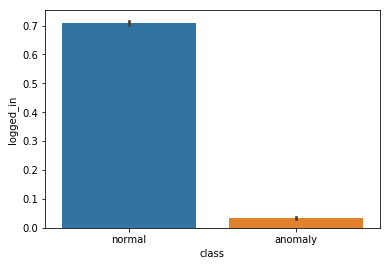

In [10]:
sns.barplot(x=df['class'], y=df['logged_in'])
plt.show()

In [11]:
df["class"] = df["class"].replace(["anomaly","normal"], [1,0])
df["protocol_type"]=df["protocol_type"].replace(["tcp","udp","icmp"],[0,1,2])

In [12]:
corrmatrix = df.corr()
corrmatrix

,duration,protocol_type,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
duration,1.000000,-0.012083,0.084864,0.013258,-0.001012,-0.010358,-0.000486,0.004202,0.011108,-0.063703,...,-0.112530,-0.119321,0.263489,0.240970,-0.025485,-0.066513,-0.066240,0.187070,0.208435,0.050901
protocol_type,-0.012083,1.000000,-0.004442,-0.017287,-0.003956,0.130640,-0.002797,-0.040819,-0.011642,-0.358593,...,0.067524,0.206310,-0.016446,0.566059,0.370650,-0.279933,-0.278556,-0.134759,-0.166184,0.048654
src_bytes,0.084864,-0.004442,1.000000,0.003611,-0.000090,-0.000916,-0.000062,0.000995,-0.000260,-0.002040,...,-0.008520,-0.006776,0.001026,0.002316,-0.001238,-0.006346,-0.006227,-0.002130,0.006190,0.005743
dst_bytes,0.013258,-0.017287,0.003611,1.000000,-0.000350,-0.003586,0.000345,0.002539,0.005197,0.012704,...,-0.000980,0.022392,-0.012971,0.024078,-0.006006,-0.015584,-0.014543,-0.014094,-0.012803,-0.010949
land,-0.001012,-0.003956,-0.000090,-0.000350,1.000000,-0.000813,-0.000056,-0.000819,-0.000234,-0.007196,...,-0.008743,0.009531,-0.003929,0.024635,0.053037,0.014291,0.005596,-0.003432,-0.003335,0.000605
wrong_fragment,-0.010358,0.130640,-0.000916,-0.003586,-0.000813,1.000000,-0.000575,-0.008386,-0.002392,-0.073674,...,-0.047256,-0.051845,0.053177,0.034670,-0.020174,-0.053786,-0.057230,0.027718,-0.034143,0.097625
urgent,-0.000486,-0.002797,-0.000062,0.000345,-0.000056,-0.000575,1.000000,0.002346,-0.000165,0.007801,...,-0.006324,-0.007014,-0.002105,-0.003013,-0.001815,-0.004044,-0.003953,-0.002427,-0.002358,0.006743
hot,0.004202,-0.040819,0.000995,0.002539,-0.000819,-0.008386,0.002346,1.000000,0.004893,0.113115,...,-0.048495,-0.033442,-0.007962,-0.030640,-0.021170,-0.055628,-0.056255,-0.027628,-0.029719,-0.012839
num_failed_logins,0.011108,-0.011642,-0.000260,0.005197,-0.000234,-0.002392,-0.000165,0.004893,1.000000,-0.006872,...,-0.022315,-0.003336,0.000298,-0.008910,-0.007551,-0.009527,-0.010238,0.016791,0.018693,0.000028
logged_in,-0.063703,-0.358593,-0.002040,0.012704,-0.007196,-0.073674,0.007801,0.113115,-0.006872,1.000000,...,0.624839,0.607379,-0.255820,-0.159278,-0.057390,-0.490450,-0.492446,-0.274430,-0.270507,-0.688084


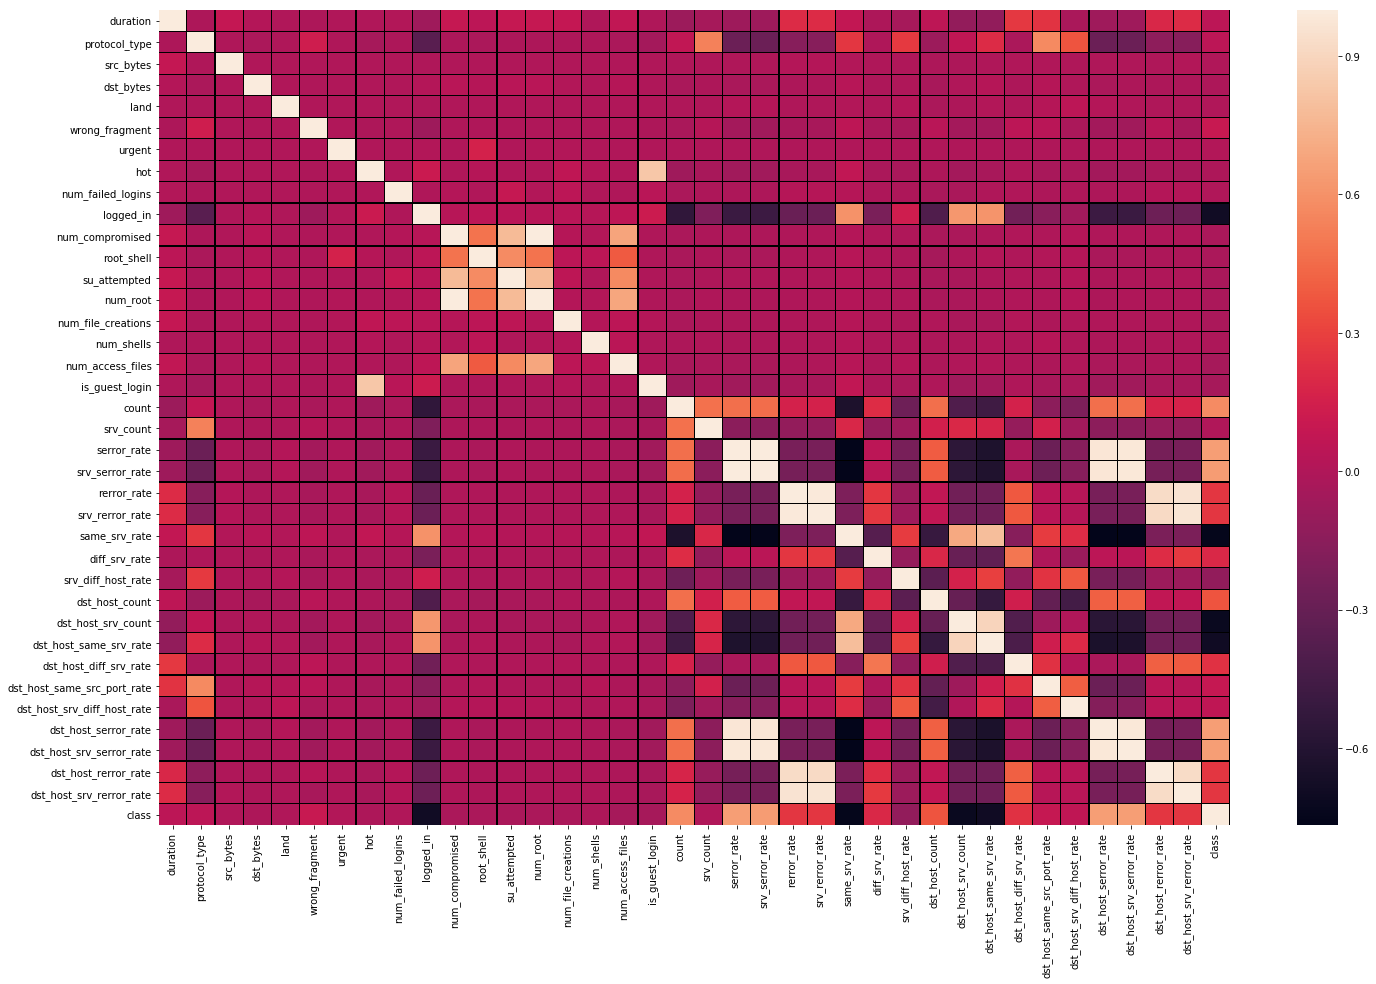

In [13]:
plt.figure(figsize=(24,15))
sns.heatmap(corrmatrix,linewidths=0.2,linecolor='black')

Text(0.5, 1.0, 'srv_serror_rate')

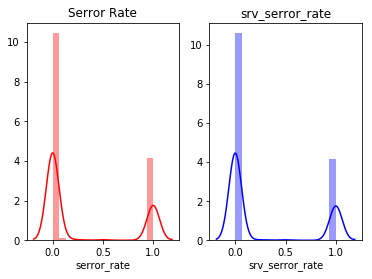

In [21]:
plt.subplot(121)
sns.distplot(df.serror_rate ,color='r')
plt.title('Serror Rate')

plt.subplot(122)
sns.distplot(df.srv_serror_rate ,color='b')
plt.title('srv_serror_rate')

Text(0.5, 1.0, 'dst_host_srv_count')

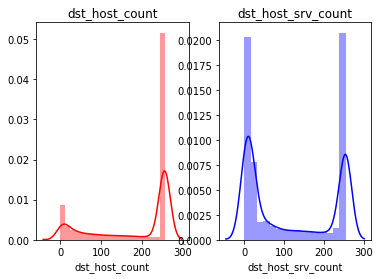

In [29]:
plt.subplot(121)
sns.distplot(df.dst_host_count ,color='r')
plt.title('dst_host_count')

plt.subplot(122)
sns.distplot(df.dst_host_srv_count ,color='b')
plt.title('dst_host_srv_count')

In [30]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_guest_login', 'count', 'srv_count',
       'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [35]:
y = df["class"]
X = df[['duration', 'protocol_type','src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_guest_login', 'count', 'srv_count',
       'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate']]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 23)
dtc1 = DecisionTreeClassifier(criterion = 'entropy')
dtc1.fit(X_train,y_train)
#y_pred = dtc1_predict(X_test)
print("Training Score", dtc1.score(X_train,y_train))
print("Testing Score", dtc1.score(X_test,y_test))

Training Score 1.0
Testing Score 0.9977770720863767


In [41]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, dtc1.predict(X_test))
cnf_matrix

array([[3337,    7],
       [   7, 2947]], dtype=int64)

In [42]:
#export the plot
export_graphviz(dtc1,feature_names=X.columns, out_file="tree.dot",
               filled = True, rounded = True,
               special_characters = True)

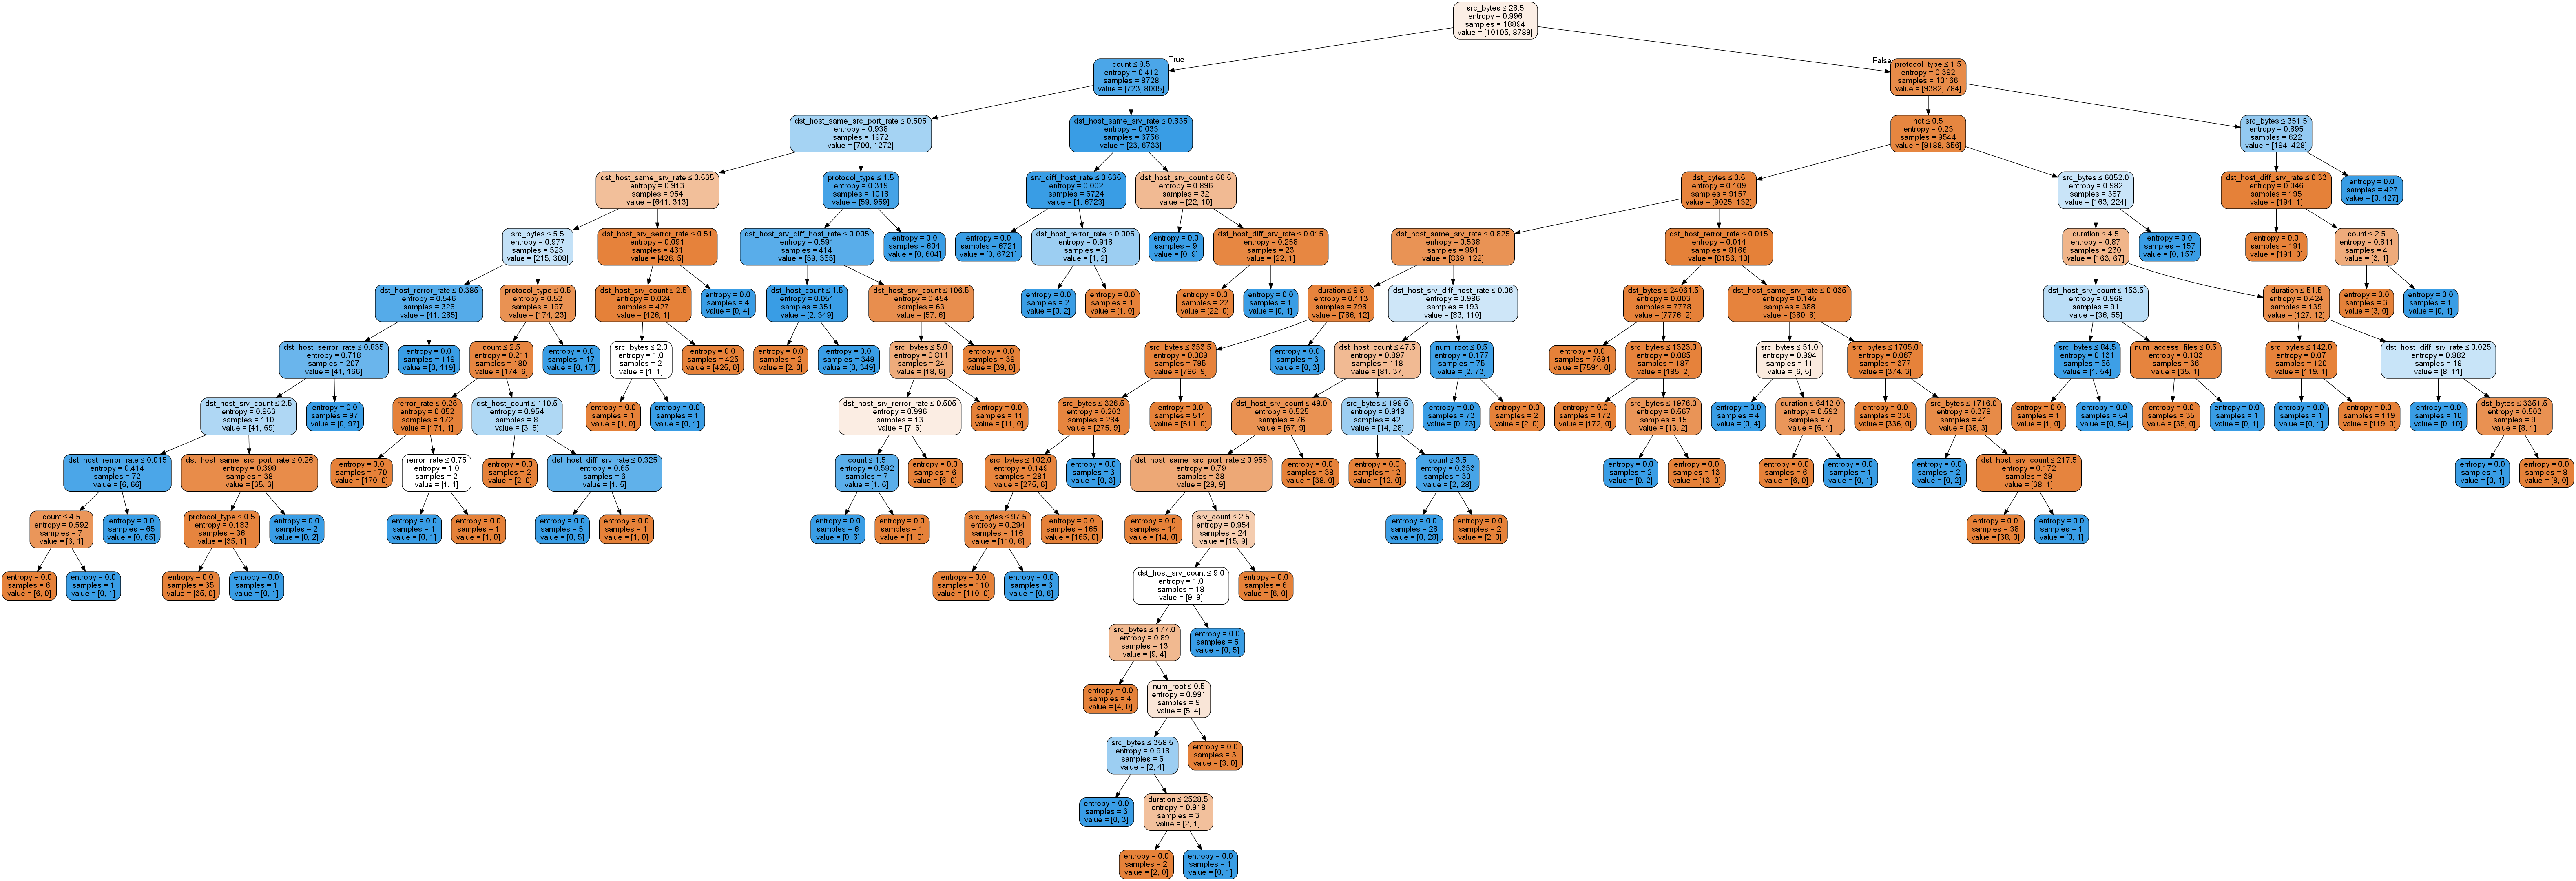

In [43]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtc1, feature_names = X.columns, out_file=dot_data,
               filled = True, rounded = True,
               special_characters= True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [44]:
for depth in range(1,20):
    print("depth", depth)
    dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth=depth,class_weight ="balanced")
    dtc1.fit(X,y)
    print("Training Score", dtc1.score(X,y))
    print("Testing Score", dtc1.score(X_test,y_test))

depth 1
Training Score 0.9999603048586853
Testing Score 1.0
depth 2
Training Score 0.9999603048586853
Testing Score 1.0
depth 3
Training Score 0.9999603048586853
Testing Score 1.0
depth 4
Training Score 0.9999603048586853
Testing Score 1.0
depth 5
Training Score 0.9999603048586853
Testing Score 1.0
depth 6
Training Score 0.9999603048586853
Testing Score 1.0
depth 7
Training Score 0.9999603048586853
Testing Score 1.0
depth 8
Training Score 0.9999603048586853
Testing Score 1.0
depth 9
Training Score 0.9999603048586853
Testing Score 1.0
depth 10
Training Score 0.9999603048586853
Testing Score 1.0
depth 11
Training Score 0.9999603048586853
Testing Score 1.0
depth 12
Training Score 0.9999603048586853
Testing Score 1.0
depth 13
Training Score 0.9999603048586853
Testing Score 1.0
depth 14
Training Score 0.9999603048586853
Testing Score 1.0
depth 15
Training Score 0.9999603048586853
Testing Score 1.0
depth 16
Training Score 0.9999603048586853
Testing Score 1.0
depth 17
Training Score 0.9999603